## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [101]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [102]:
#Read in CSV file
ab = pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [103]:
#Display no of rows in dataset
ab.shape

(294478, 5)

c. The number of unique users in the dataset.

In [104]:
#display count of unique user id's
ab['user_id'].nunique()

290584

d. The proportion of users converted.

In [105]:
#display number of people converted
ab['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [106]:
new_1 = ab[(ab.group == 'control') & (ab.landing_page == 'new_page')]
new_1.count()
new_2 = ab[(ab.group == 'treatment') & (ab.landing_page == 'old_page')]
new_2.count()
new_1.count() + new_2.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [107]:
ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [108]:
ab = pd.read_csv('ab_data.csv')
ab.head()
new_1 = ab[(ab.group == 'control') & (ab.landing_page == 'old_page')]
new_2 = ab[(ab.group == 'treatment') & (ab.landing_page == 'new_page')]
#Concat to store old, new pages to control, treatment columns
df2 = pd.concat([new_1, new_2], keys=['control', 'treatment'], axis = 0)
df2.reset_index(drop=True)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
5,644214,2017-01-22 02:05:21.719434,control,old_page,1
6,847721,2017-01-17 14:01:00.090575,control,old_page,0
7,650559,2017-01-24 11:55:51.084801,control,old_page,0
8,935734,2017-01-17 20:33:37.428378,control,old_page,0
9,746742,2017-01-23 11:38:29.592148,control,old_page,0


In [109]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [110]:
#display no of unique user ids held in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [111]:
#identify repeating uder id
df2[df2['user_id'].duplicated() == True]

,,user_id,timestamp,group,landing_page,converted
treatment,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [112]:
df2[df2.duplicated(subset = ['user_id'], keep=False)]

user_id                   timestamp      group landing_page  \
treatment 1899   773192  2017-01-09 05:37:58.781806  treatment     new_page   
          2893   773192  2017-01-14 02:55:59.590927  treatment     new_page   

                converted  
treatment 1899          0  
          2893          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [113]:
#user drop function to remove duplicate user id
df2 = df2.drop_duplicates(subset = ['user_id'], keep = 'last')
df2

user_id                   timestamp      group landing_page  \
control   0        851104  2017-01-21 22:11:48.556739    control     old_page   
          1        804228  2017-01-12 08:01:45.159739    control     old_page   
          4        864975  2017-01-21 01:52:26.210827    control     old_page   
          5        936923  2017-01-10 15:20:49.083499    control     old_page   
          7        719014  2017-01-17 01:48:29.539573    control     old_page   
          15       644214  2017-01-22 02:05:21.719434    control     old_page   
          16       847721  2017-01-17 14:01:00.090575    control     old_page   
          18       650559  2017-01-24 11:55:51.084801    control     old_page   
          19       935734  2017-01-17 20:33:37.428378    control     old_page   
          25       746742  2017-01-23 11:38:29.592148    control     old_page   
          28       913579  2017-01-24 09:11:39.164256    control     old_page   
          30       690284  2017-01-13 17:22:57.182769    control     old_page   
          34       710349  2017-01-11 22:24:44.226492    control     old_page   
          35       677533  2017-01-23 17:48:50.491821    control     old_page   
          36       831737  2017-01-11 21:18:20.911015    control     old_page   
          40       771087  2017-01-16 00:05:29.983919    control     old_page   
          42       896163  2017-01-22 09:10:20.753218    control     old_page   
          43       862225  2017-01-08 14:49:37.335432    control     old_page   
          44       939593  2017-01-05 09:15:31.984283    control     old_page   
          45       702260  2017-01-18 13:55:31.488221    control     old_page   
          50       670941  2017-01-05 08:16:41.306478    control     old_page   
          51       850231  2017-01-18 17:18:04.790584    control     old_page   
          55       685794  2017-01-20 14:54:58.150621    control     old_page   
          57       714733  2017-01-03 08:22:37.904146    control     old_page   
          58       710967  2017-01-10 02:19:22.842142    control     old_page   
          59       680201  2017-01-11 10:38:45.952887    control     old_page   
          60       790863  2017-01-19 11:02:39.220320    control     old_page   
          61       717595  2017-01-23 18:19:08.148166    control     old_page   
          62       779854  2017-01-11 21:28:30.735359    control     old_page   
          63       916307  2017-01-19 17:27:38.676600    control     old_page   
...                   ...                         ...        ...          ...   
treatment 294417   924332  2017-01-15 19:38:52.858024  treatment     new_page   
          294422   849625  2017-01-06 17:54:07.563311  treatment     new_page   
          294424   929723  2017-01-10 15:13:48.352399  treatment     new_page   
          294427   774769  2017-01-03 06:01:36.251836  treatment     new_page   
          294430   733871  2017-01-21 17:54:08.810964  treatment     new_page   
          294432   844588  2017-01-16 20:48:19.567178  treatment     new_page   
          294433   641244  2017-01-07 16:57:26.193171  treatment     new_page   
          294434   676072  2017-01-14 17:26:02.495442  treatment     new_page   
          294435   886374  2017-01-07 13:43:39.202634  treatment     new_page   
          294437   676732  2017-01-03 23:06:45.459467  treatment     new_page   
          294439   862218  2017-01-04 10:43:07.846494  treatment     new_page   
          294441   798826  2017-01-23 16:50:13.788528  treatment     new_page   
          294442   836721  2017-01-12 17:37:50.966955  treatment     new_page   
          294444   844901  2017-01-15 17:46:36.622726  treatment     new_page   
          294445   653124  2017-01-14 13:44:51.745491  treatment     new_page   
          294446   909437  2017-01-18 14:49:49.064452  treatment     new_page   
          294448   776137  2017-01-12 05:53:12.386730  treatment     new_page   
          294449   883344  2017-01-22 23:15:58.64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [114]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [115]:
#find probability that user in control group converted
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [116]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [117]:
#probability that user received new page
df2.shape

len(df2.query("landing_page == 'new_page'"))

#new page/total rows
145311/290585

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

After making a comaparison between treatment and control, control appears to score higher than treatment. There is insufficient evidence to suggest that the new treatment page has lead to more conversions, as the probability that the individual received the page is 0.5, 50%.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H1: Pold < Pnew
H0: Pold > Pnew
H0: Pold = Pnew

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [118]:
Pnew = df2.converted.mean()
Pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [119]:
Pold = df2.converted.mean()
Pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [120]:
nnew = df2.query('landing_page == "new_page"').shape[0]
nnew


145310

d. What is $n_{old}$, the number of individuals in the control group?

In [121]:
nold = df2.query('landing_page == "old_page"').shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [122]:
new_page_converted = np.random.binomial(1, Pnew, nnew)
new_page_converted

newpc = new_page_converted.mean()
newpc

0.12034271557360127

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [125]:
old_page_converted = np.random.binomial(1, Pold, nold)
old_page_converted

oldpc = old_page_converted.mean()
oldpc

0.11876867161364044

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [126]:
newpc - oldpc

0.0015740439599608302

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, Pnew, nnew)
    old_page_converted = np.random.binomial(1, Pold, nold)
    newpc = new_page_converted.mean()
    oldpc = old_page_converted.mean()
    diff = newpc - oldpc
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

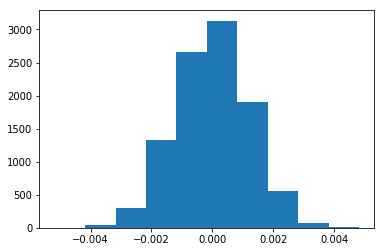

In [75]:
#Display histogram of values assigned to p_diffs array
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.90329999999999999

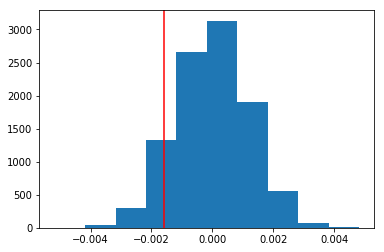

In [86]:
control = df2[df2['group'] == 'control']['converted'].mean()
control


#Display converted control group
treatment = df2[df2['group'] == 'treatment']['converted'].mean()
#Display converted treatment group
treatment

#Observed difference is treatment - control
observ_diff = treatment - control
observ_diff

observ_diff = np.array(observ_diff).astype(float)
observ_diff


plt.hist(p_diffs);
plt.axvline(x=observ_diff, color='red');
#Plot proportion of p diffs array being greater than actual difference observed
(p_diffs > observ_diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Ho: Pnew - Pold =< 0
H1: Pnew - Pold > 0

The actual difference shows the difference between converted rates of new pages and old pages, based of the dataset we have been given.

p-diffs represents the imitated difference between the converted rates of new page and old page, based of 10000 values 

In the case above, p-value is equal to a 90% chance of being p_diffs. p_value allows us to understand the probability of getting the statistic identified.    

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [73]:
import statsmodels.api as sm

#Gets old pages converted
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
#Gets new pages converted
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

count = np.array([convert_old, convert_new])


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])

z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Since the critical z score values are between -1.96 & +1.96, the p_value will then be greater than 0.05, so we cannot reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The best method to use here would be logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
#Create Intercept column
df2['intercept']=1
#Create two dummy columns
ab_page = ['treatment', 'control']
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
Result = logit.fit()
Result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        11:00:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value belonging to the ab_page column has a value of 0.19, which is less than the value calculated using the z_score function above in part m.

Only two outcomes can be determined from the logistic regression:

i.  Ho: Pnew - Pold = 0 
ii. H1: Pnew - Pold != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It would be interesting to add the timestamp for both groups, to see if there is any correlation about certain times in the day that users convert pages for example. 

Adding additonal items to the regression model would possibly distrupt the look of the model and take away from its purpose, as it is only meant for two variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
#Read in csv file
Countries = pd.read_csv('countries.csv')
Countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
df_new = Countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df_new.head()

df_new[['US','UK']] = pd.get_dummies(df_new['country'])[['US','UK']]
df_new.head()

df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new.head()

logit2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
logit2

result2 = logit2.fit()
#Provide summary of results
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Dec 2019   Pseudo R-squ.:               3.482e-05
Time:                        13:12:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0